In [1]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


## **Required Libraries:-**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Read the dataset info:-**

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##  EDA operations:-

In [4]:
#Checking for null values:-
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
#checking for duplicate values:-
data.duplicated().sum()
data[data.duplicated()]#to show the duplicate values in the dataset
data.drop_duplicates(inplace=True)

In [7]:
#checking if encoding is required:-
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
#Removing outliers from the dataset:-
for col in data.columns:
    if data[col].dtype != 'object':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound=q3 + 1.5*iqr
        lower_bound=q1 - 1.5*iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
 #In case of decision tree if we skip the part of handling outliers then it will generate
 # very minimal impact as the model is very much powreful.



## **Model building:-**

In [9]:
x=data.drop(columns='target')
y=data['target']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [24]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)#training the model

DecisionTreeClassifier()

In [25]:
y_pred=model.predict(x_test)#testing the model

In [26]:
accuracy_score(y_test,y_pred)*100 #accuracy score

78.26086956521739

In [27]:
model.get_depth()

7

In [28]:
# Finding of optimal model:-
for i in range(1,101):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"Accuracy score for tree with depth{i}:{accuracy_score(y_test,y_pred)}")


Accuracy score for tree with depth1:0.7608695652173914
Accuracy score for tree with depth2:0.782608695652174
Accuracy score for tree with depth3:0.8695652173913043
Accuracy score for tree with depth4:0.782608695652174
Accuracy score for tree with depth5:0.8043478260869565
Accuracy score for tree with depth6:0.8913043478260869
Accuracy score for tree with depth7:0.8478260869565217
Accuracy score for tree with depth8:0.8043478260869565
Accuracy score for tree with depth9:0.8260869565217391
Accuracy score for tree with depth10:0.782608695652174
Accuracy score for tree with depth11:0.8043478260869565
Accuracy score for tree with depth12:0.782608695652174
Accuracy score for tree with depth13:0.8043478260869565
Accuracy score for tree with depth14:0.8695652173913043
Accuracy score for tree with depth15:0.8913043478260869
Accuracy score for tree with depth16:0.8260869565217391
Accuracy score for tree with depth17:0.8695652173913043
Accuracy score for tree with depth18:0.8478260869565217
Accur

In [51]:
model=DecisionTreeClassifier(max_depth=6)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
D_tree_scoor=accuracy_score(y_test,y_pred)*100
D_tree_scoor

82.6086956521739

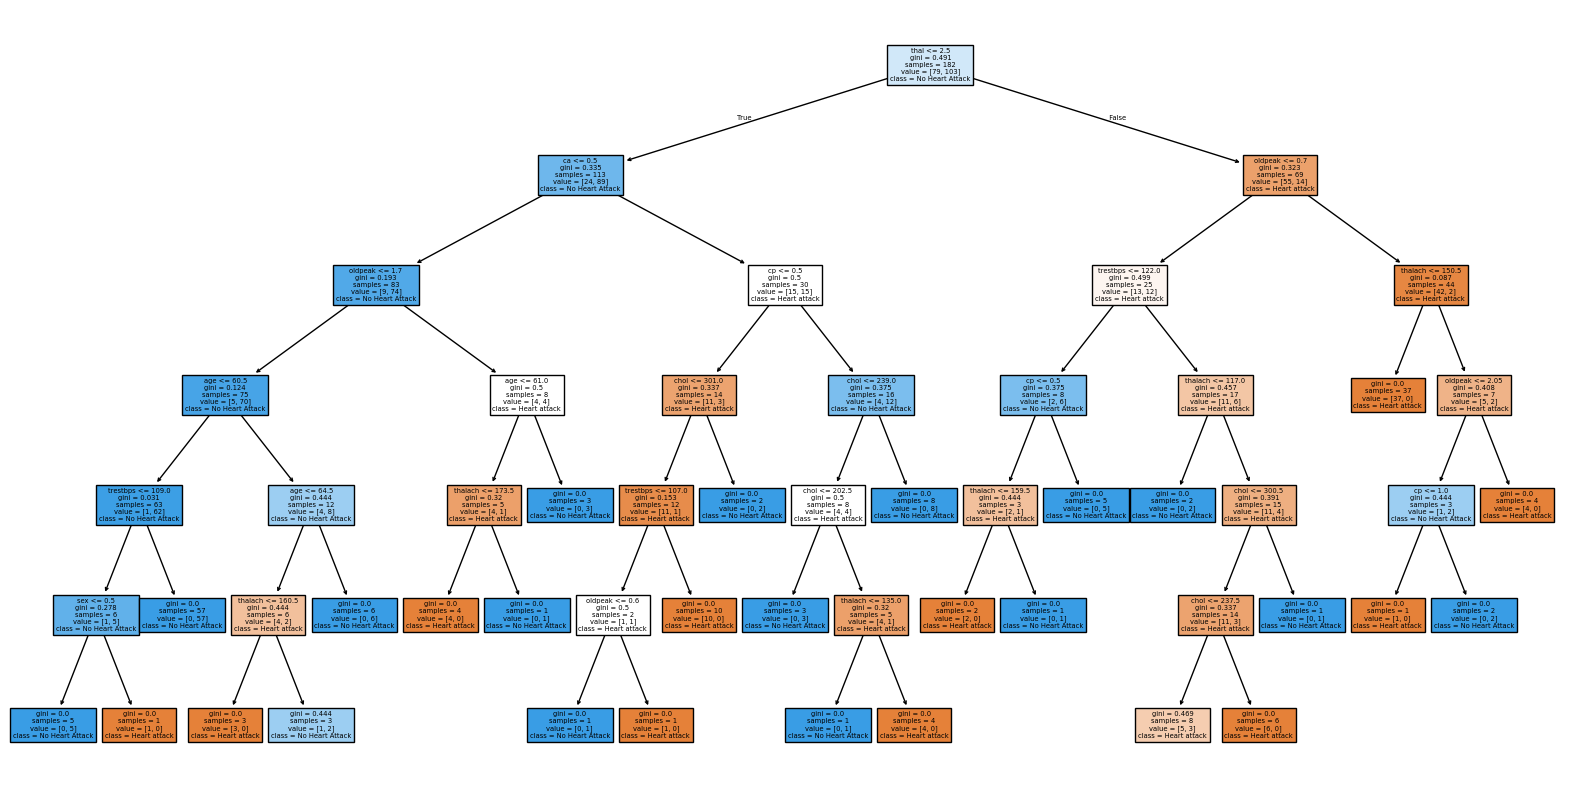

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['Heart attack','No Heart Attack'])
plt.show()

## **Logistic Regression Model:-**

In [32]:
from sklearn.linear_model import LogisticRegression

In [35]:
reg_model=LogisticRegression()
reg_model

LogisticRegression()

In [52]:
reg_model.fit(x_train,y_train)
y_pred=reg_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
logistic_score=accuracy_score(y_test,y_pred)*100
logistic_score

89.13043478260869

In [40]:
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100}")


Accuracy:89.13043478260869


## **COPMAPRISON BETWEEN DECISION TREE AND LOGISTIC REGRESSION**

In [54]:
print("Accuracy score of Decision Tree Model:-",D_tree_scoor)
print("Accuracy score of Logistic Regression Model:-",logistic_score)

Accuracy score of Decision Tree Model:- 82.6086956521739
Accuracy score of Logistic Regression Model:- 89.13043478260869


## **Why we are having better score on logistic model?**

In [55]:
# As the dataset is not large and that much complex the decision tree model is overfitting.
# In case of easy datasets we can go with Logistic Regression Model.